Implement a classification method on whether the person defaulted or not. Try out all the parameters in logistic regression like L1, L2, and values of C. Also try out Keras model with different combination of layers,units and activation functions

#### Logistic Regression

In [14]:
#Importing necessary libararies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls",header=1)

In [3]:
#Exploratory Data Analysis
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

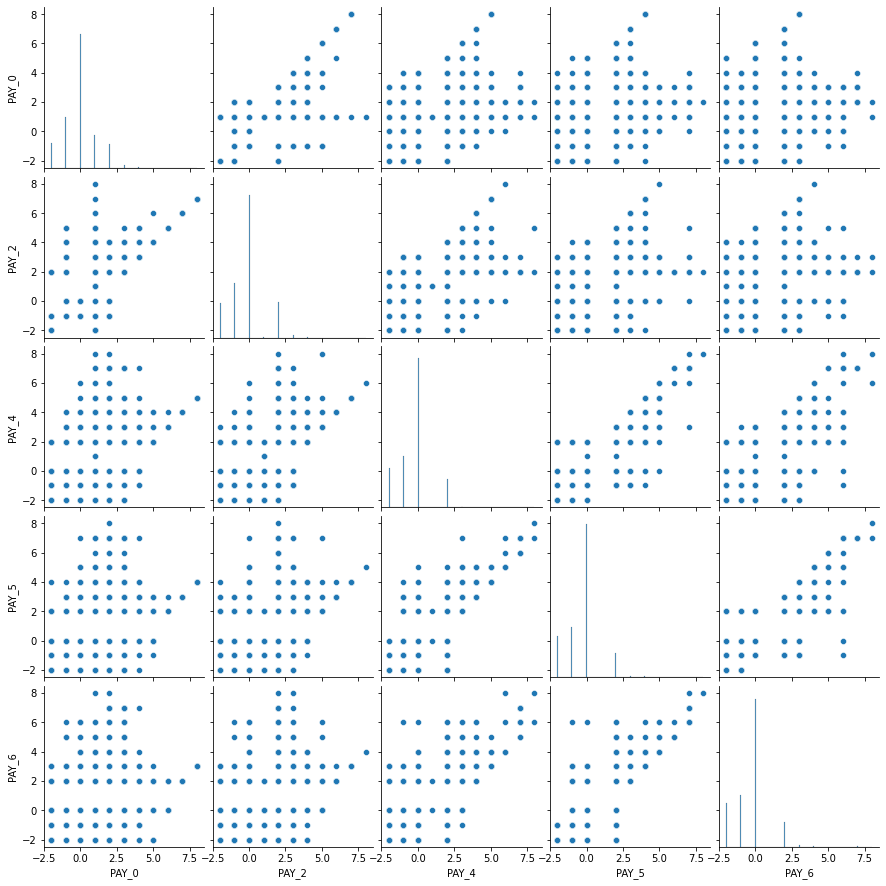

In [40]:
#Correlation between features
crr_df= df[['PAY_0','PAY_2','PAY_4','PAY_5','PAY_6']]
sns.pairplot(crr_df)

Many features are positively correlated

In [6]:
#Renaming label class
df.rename(columns={"default payment next month":"Default"},inplace=True)

0    23364
1     6636
Name: Default, dtype: int64


Text(0.5, 1.0, 'COUNT OF CREDIT CARDS DEFALUTERS')

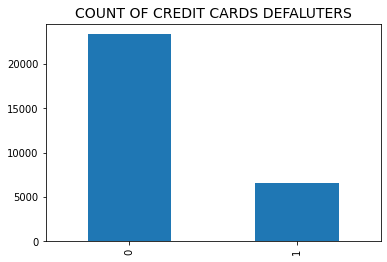

In [7]:
print(df['Default'].value_counts())
df['Default'].value_counts().plot(kind='bar')
plt.title('COUNT OF CREDIT CARDS DEFALUTERS', size=14)

Count shows data have Class imbalance problem,

In [8]:
df.shape

(30000, 25)

In [9]:
dum_df = pd.get_dummies(df)

In [10]:
dum_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [11]:
#Creating dependent and independent variables
y = dum_df['Default'].values
X = dum_df.drop('Default',axis=1).values

In [12]:
#Spliting data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [15]:
#Normalizing Data to same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
#Hyperparameters
C = [10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty =  ['l1','l2']
for i in C:
  for j in solver:
    for k in penalty:
      if j=="newton-cg" or j=="lbfgs":
        k='l2'
      lr = LogisticRegression(C=i,solver=j,penalty=k)
      lr.fit(X_train, y_train)
      y_predict = lr.predict(X_test)
      print("Accuracy with: ","C=",i,'penalty=',j,'solver=',k,"is",accuracy_score(y_test,y_predict))
      print("Missclassified", (y_predict!=y_test).sum())
      print("Confusion Matrix",confusion_matrix(y_predict,y_test),'\n')
      print("*"*40)

Accuracy with:  C= 10 penalty= newton-cg solver= l2 is 0.8161111111111111
Missclassified 1655
Confusion Matrix [[6900 1495]
 [ 160  445]] 

****************************************
Accuracy with:  C= 10 penalty= newton-cg solver= l2 is 0.8161111111111111
Missclassified 1655
Confusion Matrix [[6900 1495]
 [ 160  445]] 

****************************************
Accuracy with:  C= 10 penalty= lbfgs solver= l2 is 0.8161111111111111
Missclassified 1655
Confusion Matrix [[6900 1495]
 [ 160  445]] 

****************************************
Accuracy with:  C= 10 penalty= lbfgs solver= l2 is 0.8161111111111111
Missclassified 1655
Confusion Matrix [[6900 1495]
 [ 160  445]] 

****************************************
Accuracy with:  C= 10 penalty= liblinear solver= l1 is 0.8161111111111111
Missclassified 1655
Confusion Matrix [[6900 1495]
 [ 160  445]] 

****************************************
Accuracy with:  C= 10 penalty= liblinear solver= l2 is 0.8161111111111111
Missclassified 1655
Confusion

##### From the above result we will get Highest Accuracy of 81.64% with C= 10 penalty= liblinear solver= l1

#### Prediction using Tensorflow/Keras

In [18]:
import tensorflow as tf

In [27]:
#Adding layers to the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(50, activation='relu'),    #Input layer
  tf.keras.layers.Dense(40, activation='relu'),     #Hidden Layer
  tf.keras.layers.Dense(1,activation='sigmoid')     #Output layer
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                1250      
_________________________________________________________________
dense_5 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 41        
Total params: 3,331
Trainable params: 3,331
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Comping the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [29]:
#Train the model on the data
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
657/657 [==============================] - 1s 1ms/step - loss: 0.5091 - accuracy: 0.7845
Epoch 2/50
657/657 [==============================] - 1s 1ms/step - loss: 0.4549 - accuracy: 0.8119
Epoch 3/50
657/657 [==============================] - 1s 1ms/step - loss: 0.4394 - accuracy: 0.8185
Epoch 4/50
657/657 [==============================] - 1s 1ms/step - loss: 0.4411 - accuracy: 0.8181
Epoch 5/50
657/657 [==============================] - 1s 1ms/step - loss: 0.4324 - accuracy: 0.8198
Epoch 6/50
657/657 [==============================] - 1s 1ms/step - loss: 0.4327 - accuracy: 0.8194
Epoch 7/50
657/657 [==============================] - 1s 1ms/step - loss: 0.4293 - accuracy: 0.8189
Epoch 8/50
657/657 [==============================] - 1s 1ms/step - loss: 0.4262 - accuracy: 0.8209
Epoch 9/50
657/657 [==============================] - 1s 1ms/step - loss: 0.4283 - accuracy: 0.8202
Epoch 10/50
657/657 [==============================] - 1s 1ms/step - loss: 0.4269 - accuracy: 0.8202

Conclusion: We get highest accuracy of approx 85% using Keras model with 3 layers.

#### Since the data have Class imbalance problem, we will oversample the minority class

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [34]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 16304, 1: 4696})
After SMOTE : Counter({0: 16304, 1: 16304})


#### Logistic regression on oversampled data

In [35]:
#Hyperparameters
C = [10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty =  ['l1','l2']
for i in C:
  for j in solver:
    for k in penalty:
      if j=="newton-cg" or j=="lbfgs":
        k='l2'
      lr = LogisticRegression(C=i,solver=j,penalty=k)
      lr.fit(X_train_smote, y_train_smote)
      y_predict = lr.predict(X_test)
      print("Accuracy with: ","C=",i,'penalty=',j,'solver=',k,"is",accuracy_score(y_test,y_predict))
      print("Missclassified", (y_predict!=y_test).sum())
      print("Confusion Matrix",confusion_matrix(y_predict,y_test),'\n')
      print("*"*40)

Accuracy with:  C= 10 penalty= newton-cg solver= l2 is 0.676
Missclassified 2916
Confusion Matrix [[4835  691]
 [2225 1249]] 

****************************************
Accuracy with:  C= 10 penalty= newton-cg solver= l2 is 0.676
Missclassified 2916
Confusion Matrix [[4835  691]
 [2225 1249]] 

****************************************
Accuracy with:  C= 10 penalty= lbfgs solver= l2 is 0.6762222222222222
Missclassified 2914
Confusion Matrix [[4837  691]
 [2223 1249]] 

****************************************
Accuracy with:  C= 10 penalty= lbfgs solver= l2 is 0.6762222222222222
Missclassified 2914
Confusion Matrix [[4837  691]
 [2223 1249]] 

****************************************
Accuracy with:  C= 10 penalty= liblinear solver= l1 is 0.6765555555555556
Missclassified 2911
Confusion Matrix [[4840  691]
 [2220 1249]] 

****************************************
Accuracy with:  C= 10 penalty= liblinear solver= l2 is 0.676
Missclassified 2916
Confusion Matrix [[4835  691]
 [2225 1249]] 

**

#### Keras result on oversampled data

In [36]:
model.fit(X_train_smote, y_train_smote, epochs=50)

Epoch 1/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4930 - accuracy: 0.7491
Epoch 2/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4830 - accuracy: 0.7569
Epoch 3/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4792 - accuracy: 0.7590
Epoch 4/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4757 - accuracy: 0.7632
Epoch 5/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4718 - accuracy: 0.7650
Epoch 6/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4690 - accuracy: 0.7639
Epoch 7/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4661 - accuracy: 0.7664
Epoch 8/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4639 - accuracy: 0.7695
Epoch 9/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.4606 - accuracy: 0.7717
Epoch 10/50
1019/1019 [==============================] - 2s 2ms/step - loss: 0.459

#### Conclusion: Over sampling technique puts more weight to the small class, makes the model bias to it. The model will now predict the small class with higher accuracy but the overall accuracy will decrease.
Hence we get approx 68% accuracy in Logistic Regressiona and 81% in keras model.
